<center>

# **K-CLUSTERIZAÇÃO APLICADA A SEGMENTAÇÃO DE IMAGENS** 

**Ariane Marina de Albuquerque Teixeira**

**Projeto Final - Estrutura de Dados e Complexidade de Algoritmos - PPGI - UFPB**


**Importando as Bibliotecas**

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import random 
import time
from PIL import Image 
from numpy import asarray 

**Segmentação de Imagens**

  A segmentação de imagens tem basicamente dois objetivos: decompor a imagem em partes para posterior análise e realizar uma mudança de representação (SHAPIRO E STOCKMAN, 2001). O resultado final esperado de um processo de segmentação é um número finito de regiões homogêneas, que individualizam as diferentes regiões contidas numa imagem. Sendo assim, a imagem seria formada por um conjunto de regiões, conectadas pelas suas bordas e que não se sobrepõe, de tal forma que cada pixel da imagem pertence unicamente a uma determinada região (ACHARYA E RAY, 2005).

  Uma das ideais principais das técnicas de segmentação é encontrar e individualizar as regiões na imagem que tenham feições similares. Intuitivamente, padrões pertencentes a um dado grupo devem ser mais similares entre si do que em relação a padrões pertencentes a outros grupos (MOSCATO E ZUBEN, 2002). Técnicas de agrupamento (do termo original em inglês clustering), encontradas na literatura de reconhecimento de padrões possuem objetivos similares e, sendo assim, segundo Jain (1989), podem ser aplicadas para a segmentação de imagens. 

**K-Clusterização**

A clusterização (do inglês clustering) é uma técnica utilizada para agrupar dados de acordo com a semelhança entre eles (JAIN; MURTY; FLYNN, 1999). Assim, um problema de clusterização trata-se de agrupar objetos de uma base de dados X, de modo que os mais similares fiquem no mesmo cluster e os mais distintos sejam alocados para clusters diferentes (OCHI; DIAS; SOARES, 2004). Em outras palavras, toda clusterização é feita com objetivo de maximizar a homogeneidade dentro de cada cluster e maximizar a heterogeneidade entre clusters.

**Instâncias**

Serão utilizadas como instâncias para o problema de k-clusterização as seguintes imagens em tons de cinza:

- Lena - 256x256
- CameraMan - 256x256
- NWU - 256x256
- Babuíno - 512x512
- Lotus - 1024x1024

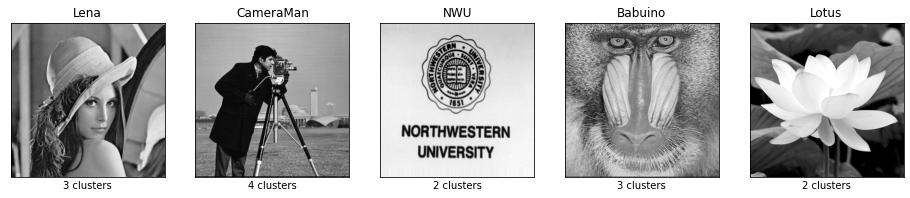

In [89]:
#Visualizando as imagens

instancias = ['Lena.png','CameraMan.tif','NWU.tif','Babuino.png','Lotus.jpg']
clusters =[3,4,2,3,2]

plt.figure(figsize=(16,8))
for i in range(len(instancias)):
  plt.subplot(1,5,i+1)
  plt.title(instancias[i][:-4])
  plt.grid(False)
  plt.xticks([])
  plt.yticks([]) 
  plt.xlabel(str(clusters[i])+' clusters')
  plt.imshow(lerImagem(instancias[i]), cmap='gray')

# **PROBLEMA DE OTIMIZAÇÃO COMBINATÓRIO (POC)**

**Definição do Problema**

Considerando uma imagem $I$ de tamanho $i$ x $j$, o conjunto de objetos a ser agrupados será uma matriz $D$ de células de dimensão $i$ x $j$ onde $Dᵢⱼ$ representará o tom de cinza da imagem naquele ponto. Os objetos devem ser clusterizados em $k$ clusters disjuntos $C = {C₁,C₂,..,Cₖ}$ , de forma que tenhamos as seguintes condições respeitadas:


$
1. C₁ ∪ C₂ ∪ … ∪ Cₖ = D;
$

$
2. Cᵢ ≠ ∅ , ∀ i,1 ≤ i≤ k;
$

$
3. Cᵢ ∩ Cⱼ = ∅, ∀ i ≠ j, 1 ≤ i ≤ k, 1 ≤ j ≤ k.
$

A primeira condição afirma que os valores de dados atribuídos a todos os clusters representarão a imagem completa. A próxima condição garante que haverá pelo menos um pixel em cada cluster formado. A última condição implica que todos os clusters formados serão mutuamente exclusivos, ou seja, um pixel não será atribuído a dois clusters. 

**Medida de Similaridade**

Como medida de Similaridade será utilizada a distancia de tom de cinza, pois será a caracteristica  a ser comparada entre os pixels. Seja $I$ uma imagem de tons de cinza e, $x$ e $y$ dois pixels de $I$. A distância de tom de cinza $\operatorname{d}{t}$ entre $x$ e $y$ será:

$$
\operatorname{d}{t} = |I(\operatorname{x}) -  I(\operatorname{y})|
$$


**Parâmetros**

  - $Dᵢⱼ$: matriz da imagem com a informação de tom de cinza para cada pixel.

  - $k$: número de clusters que a imagem será dividida.



# **HEURÍSTICAS PARA O POC**

**Representação da Solução**

A solução do problema será representada da seguinte forma:

- Um vetor $v$ com $k$ posições, sendo cada posição ocupada pelo código do pixel que foi escolhido como centroide do cluster.

- Uma matriz $X$ de mesma dimensão da matriz da imagem $I$ inicial $D$, no qual cada posição armazena o cluster ao qual aquele pixel pertence.



**Função de Avaliação**

O objetivo da clusterização é agrupar os pixels em tons próximos no mesmo cluster, e em tons distantes em clusters distintos. Dessa forma, a função de avaliação da solução será:


$$
f(D,X) = \sum_{i=0}^{m} \sum_{j=0}^{n}|Dᵢⱼ - Xᵢⱼ|
$$





In [3]:
def avaliacaoSolucao(m_imagem,matriz):
  x, y = m_imagem.shape

  avaliacao = 0

  for i in range(x):
    for j in range(y):
        dist = abs(m_imagem[i][j]-matriz[i][j])
        avaliacao += dist
  return avaliacao

**Heurística de Construção**

1. Escolher aleatoriamente os centroídes dos clusters.
2. Atribuir cada pixel da imagem ao centroíde mais próximo.




In [4]:
def lerImagem(imagem):
  image = Image.open(imagem)
  m_imagem = asarray(image)

  return m_imagem

In [6]:
def determinarCentroides(m_imagem,k):

  min = m_imagem.min()
  max = m_imagem.max()
  
  centroides=[]
  for i in range(k):
    centroides.append(random.randint(min,max))
  centroides.sort()  

  return centroides

In [7]:
def atribuirCentroides(m_imagem, centroides):

  x, y = m_imagem.shape
  solucao = np.zeros((x, y),dtype = int)  

  for i in range(x):
    for j in range(y):
      menordist = 256
      for c in centroides:
        dist = abs(m_imagem[i][j]-c)
        if dist<menordist:
          menordist = dist
          centroide = c
      solucao[i][j] = centroide
  return solucao

In [77]:
def k_clustering(imagem,k):
  ini = time.time()

  m_imagem = lerImagem(imagem) 
  centroides = determinarCentroides(m_imagem,k)
  solucao = atribuirCentroides(m_imagem,centroides)
  avaliacao = avaliacaoSolucao(m_imagem,solucao)

  fim = time.time()
  tempo = fim-ini

  print('Melhores centroides: '+str(centroides)[1:-1]+'\nMelhor avaliação: '+ str(avaliacao)+'\nTempo de Execução: '+str(round(tempo))+' s')
  return solucao,avaliacao,centroides,tempo

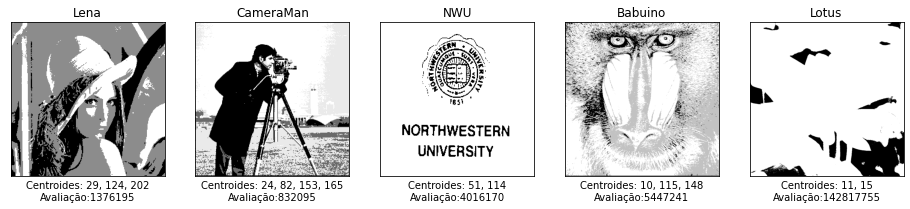

In [25]:
#Visualizando o resultado das imagens com a heurística de construção

solucao_hconst = []
avaliacao_hconst = []
centroides_hconst = []
plt.figure(figsize=(16,8))
for i in range(len(instancias)):
  plt.subplot(1,5,i+1)
  plt.title(instancias[i][:-4])
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  solucao,avaliacao,centroides = k_clustering(instancias[i],clusters[i])
  solucao_hconst.append(solucao)
  avaliacao_hconst.append(avaliacao)
  centroides_hconst.append(centroides)
  plt.imshow(solucao,cmap='gray')
  plt.xlabel('Centroides: '+ str(centroides)[1:-1] +'\nAvaliação:'+ str(avaliacao))
plt.show()

**Heurísticas de Refinamento** (Movimento de Vizinhaça)

  A vizinhança a ser adotada para o problema será o de cinco tons de cinza superior e inferior de cada um dos centroides. 

Como por exemplo, considerando os centroides de uma determinada solução como c = {70, 141}, os seus possiveis vizinhos serão os seguintes conjuntos de centroides:

- {65, 141}
- {75, 141}
- {70, 136}
- {70, 146}


A técnica de refinamento adotada será o **Método da Descida/Subida**. A ideia desta técnica é partir de uma solução inicial qualquer e a cada passo
analisar todos os seus possíveis vizinhos, movendo somente para aquele que representar uma melhora no valor atual da função de avaliação. 

In [10]:
def movimentoVizinhanca(m_imagem,centroides,avaliacao,iteracoes):
  k = len(centroides)
  movimentos = [-5,+5]
  melhor_centroide = centroides
  melhor_avaliacao = avaliacao
  
  nova_avaliacao = avaliacao
  novo_centroide = centroides

  for num in range(iteracoes):
    for w in range(k):
      for m in movimentos:
        n_centroide = melhor_centroide.copy()
        n_centroide[w] += m

        solucao = atribuirCentroides(m_imagem, n_centroide)
        avaliacao = avaliacaoSolucao(m_imagem,solucao)
        if avaliacao<=nova_avaliacao:
          nova_avaliacao = avaliacao
          novo_centroide = n_centroide
          nova_solucao = solucao
          
    if novo_centroide != melhor_centroide:
      melhor_centroide = novo_centroide
      melhor_avaliacao = nova_avaliacao
      melhor_solucao = solucao

      #print('MELHOR',num,':', melhor_centroide,melhor_avaliacao)
    else:
      return melhor_centroide, melhor_avaliacao, melhor_solucao 
  
  return melhor_centroide, melhor_avaliacao, melhor_solucao 

In [76]:
def k_clustering_viz(imagem,k,iteracoes):
  ini = time.time()

  m_imagem = lerImagem(imagem) 
  centroides = determinarCentroides(m_imagem,k)
  solucao = atribuirCentroides(m_imagem,centroides)
  avaliacao = avaliacaoSolucao(m_imagem,solucao)

  melhor_centroides, melhor_avaliacao, melhor_solucao = movimentoVizinhanca(m_imagem,centroides,avaliacao,iteracoes)

  fim = time.time()
  tempo = fim-ini

  print('Melhores Centroides: '+str(melhor_centroides)[1:-1]+'\nMelhor avaliação: '+ str(melhor_avaliacao)+'\nTempo de Execução: '+str(round(tempo))+' s')
  return melhor_solucao, melhor_centroides, melhor_avaliacao, tempo

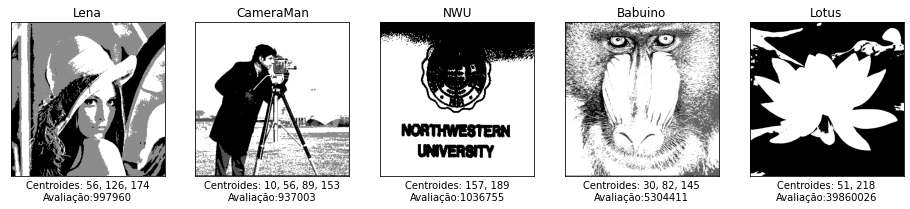

In [51]:
#Visualizando o resultado das imagens com a heurística de refinamento
solucao_href = []
avaliacao_href = []
centroides_href = []
plt.figure(figsize=(16,8))
for i in range(len(instancias)):
  plt.subplot(1,5,i+1)
  plt.title(instancias[i][:-4])
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  solucao, centroides, avaliacao, tempo = k_clustering_viz(instancias[i],clusters[i],10)
  solucao_href.append(solucao)
  avaliacao_href.append(avaliacao)
  centroides_href.append(centroides)
  plt.imshow(solucao,cmap='gray')
  plt.xlabel('Centroides: '+ str(centroides)[1:-1] +'\nAvaliação:'+ str(avaliacao))
plt.show()

# **META-HEURÍSTICA PARA O POC**

**BUSCA LOCAL ITERADA**

O método da Busca Local Iterada, *Iterated Local Search* (ILS), é baseado na ideia de que um procedimento de busca local pode ser melhorado gerando-se novas soluções de partida,
as quais são obtidas por meio de perturbações na solução ótima local.


Para aplicar um algoritmo ILS, quatro componentes têm que ser especificadas:

1.  Procedimento *GeraSolucaoInicial*(), que gera uma solução inicial
s₀ para o problema; 

2.  Procedimento *BuscaLocal*(), que retorna uma solução
possivelmente melhorada s''; 

3. Procedimento *Perturbacao*(), que modifica a solução corrente s guiando a uma solução intermediária s', e;

3. Procedimento *CriterioAceitacao*(), que decide de qual solução a próxima perturbação será aplicada.


A figura abaixo mostra-se o pseudocódigo de um algoritmo ILS básico.
<center>

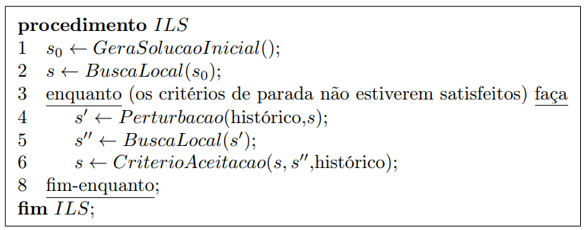

In [53]:
def GeraSolucaoInicial(imagem,k):
  m_imagem = lerImagem(imagem) 
  centroides = determinarCentroides(m_imagem,k)
  solucao = atribuirCentroides(m_imagem,centroides)
  avaliacao = avaliacaoSolucao(m_imagem,solucao)

  return m_imagem,centroides,avaliacao,solucao

In [55]:
def BuscaLocal(m_imagem,centroides,avaliacao,iteracoes,solucao):
  k = len(centroides)
  movimentos = [-5,+5]
  melhor_centroide = centroides
  melhor_avaliacao = avaliacao
  melhor_solucao = solucao
  
  nova_avaliacao = avaliacao
  novo_centroide = centroides
  nova_solucao = solucao

  for num in range(iteracoes):
    for w in range(k):
      for m in movimentos:
        n_centroide = melhor_centroide.copy()
        n_centroide[w] += m

        solucao = atribuirCentroides(m_imagem, n_centroide)
        avaliacao = avaliacaoSolucao(m_imagem, solucao)
        if avaliacao<=nova_avaliacao:
          nova_avaliacao = avaliacao
          novo_centroide = n_centroide
          nova_solucao = solucao
          
    if novo_centroide != melhor_centroide:
      melhor_centroide = novo_centroide
      melhor_avaliacao = nova_avaliacao
      melhor_solucao = nova_solucao

    else:
      #print('MELHOR:', melhor_centroide,melhor_avaliacao)
      return melhor_solucao, melhor_centroide, melhor_avaliacao 

  #print('MELHOR:', melhor_centroide,melhor_avaliacao)
  return melhor_solucao, melhor_centroide, melhor_avaliacao

In [62]:
def Perturbacao(m_imagem,centroides,k):
  num = random.randint(0,k-1)
  
  min = m_imagem.min()
  max = m_imagem.max()

  centroides[num] = random.randint(min,max)

  centroides.sort()

  solucao = atribuirCentroides(m_imagem,centroides)
  avaliacao = avaliacaoSolucao(m_imagem,solucao)

  return solucao, centroides, avaliacao

In [56]:
def CriterioAceitacao(solucao,centroide,avaliacao,nova_solucao,novo_centroide,nova_avaliacao):
  if nova_avaliacao<=avaliacao:
    return nova_solucao, novo_centroide,nova_avaliacao
  else:
    return solucao,centroide,avaliacao

In [73]:
def k_clustering_ILS(imagem,k,iteracao):
    ini = time.time()

    m_imagem,centroide,avaliacao, solucao = GeraSolucaoInicial(imagem,k)
    solucao,centroide,avaliacao = BuscaLocal(m_imagem,centroide,avaliacao,iteracao, solucao)
    
    for i in range(3):
      anterior_solucao,anterior_centroide,anterior_avaliacao = solucao.copy(),centroide.copy(),avaliacao.copy()

      nova_solucao, novo_centroide, nova_avaliacao = Perturbacao(m_imagem,centroide,k)
      nova_solucao, novo_centroide, nova_avaliacao = BuscaLocal(m_imagem,novo_centroide,nova_avaliacao,iteracao,nova_solucao)
      solucao, centroide, avaliacao = CriterioAceitacao(anterior_solucao,anterior_centroide,anterior_avaliacao,nova_solucao,novo_centroide,nova_avaliacao)

    fim = time.time()
    tempo = fim-ini

    print('Melhores centroides: '+str(centroide)[1:-1]+'\nMelhor avaliação: '+ str(avaliacao)+'\nTempo de Execução: '+str(round(tempo))+' s')
    return solucao, centroide, avaliacao, tempo

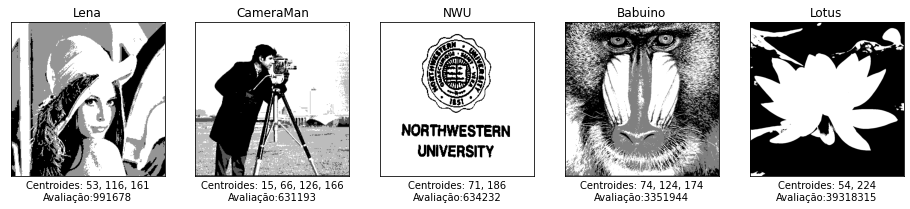

In [29]:
#Visualizando o resultado das imagens com a meta-heurística

solucao_ILS = []
avaliacao_ILS = []
centroides_ILS = []
plt.figure(figsize=(16,8))
for i in range(len(instancias)):
  plt.subplot(1,5,i+1)
  plt.title(instancias[i][:-4])
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  solucao, centroides, avaliacao, tempo = k_clustering_ILS(instancias[i],clusters[i],10)
  solucao_ILS.append(solucao)
  avaliacao_ILS.append(avaliacao)
  centroides_ILS.append(centroides)
  plt.imshow(solucao,cmap='gray')
  plt.xlabel('Centroides: '+ str(centroides)[1:-1] +'\nAvaliação:'+ str(avaliacao))
plt.show()

# **RESULTADOS VISUAIS COMPARATIVOS**

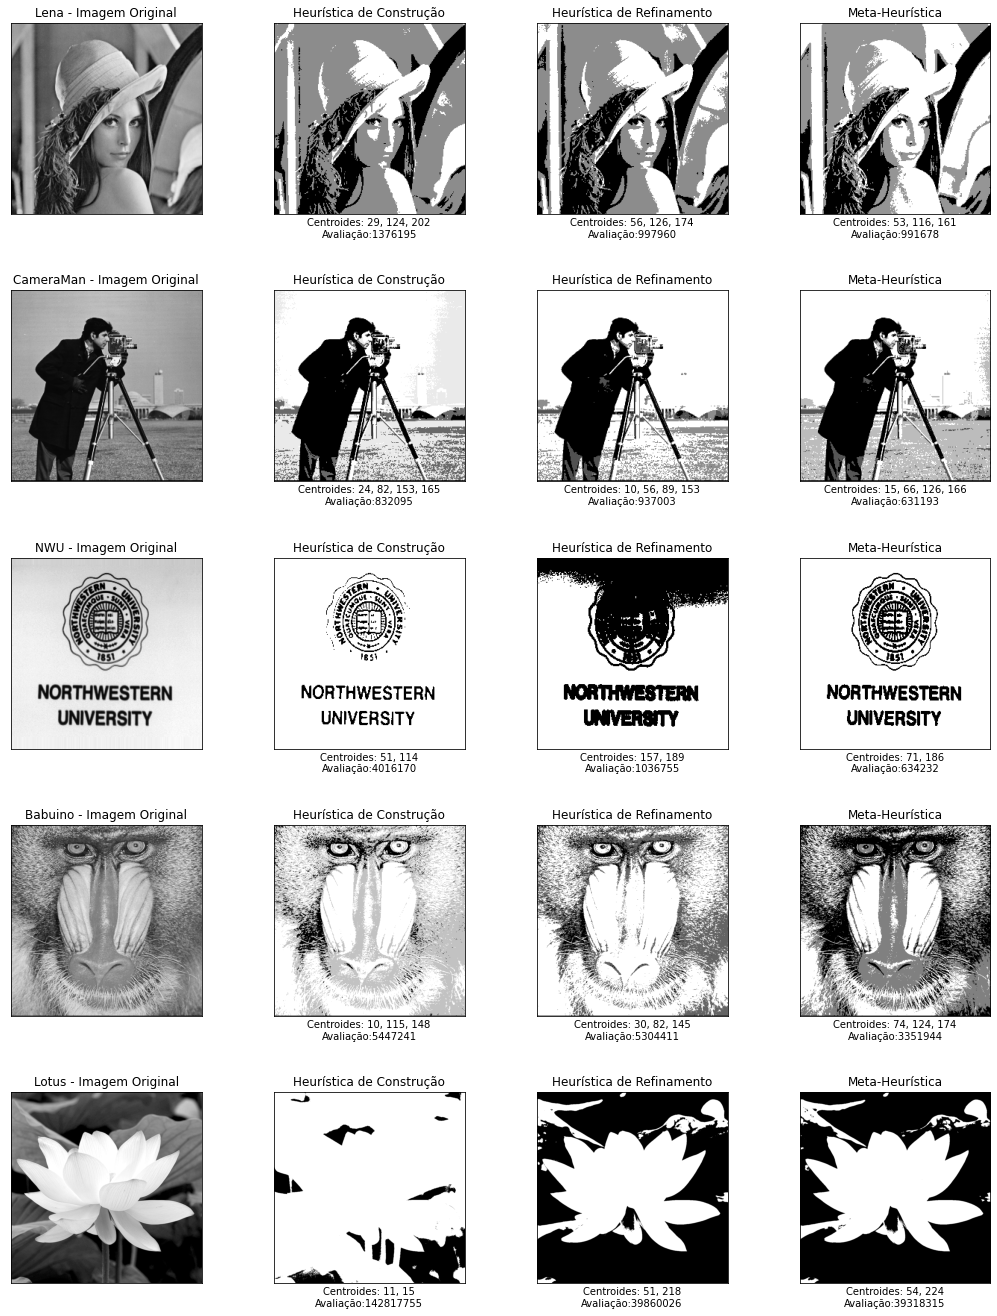

In [90]:
plt.figure(figsize=(20,25))
k=0
for i in range(len(instancias)):
  k+=1
  plt.subplot(5,4,k)
  plt.title(instancias[i][:-4]+ ' - Imagem Original')
  plt.grid(False)
  plt.xticks([])
  plt.yticks([]) 
  plt.imshow(lerImagem(instancias[i]), cmap='gray')
  
  k+=1
  plt.subplot(5,4,k)
  plt.title('Heurística de Construção')
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(solucao_hconst[i], cmap='gray')
  plt.xlabel('Centroides: '+ str(centroides_hconst[i])[1:-1] +'\nAvaliação:'+ str(avaliacao_hconst[i]))

  k+=1
  plt.subplot(5,4,k)
  plt.title('Heurística de Refinamento')
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(solucao_href[i], cmap='gray')
  plt.xlabel('Centroides: '+ str(centroides_href[i])[1:-1] +'\nAvaliação:'+ str(avaliacao_href[i]))

  k+=1
  plt.subplot(5,4,k)
  plt.title('Meta-Heurística')
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(solucao_ILS[i], cmap='gray')
  plt.xlabel('Centroides: '+ str(centroides_ILS[i])[1:-1] +'\nAvaliação:'+ str(avaliacao_ILS[i]))

  plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.8,  
                    top=0.8,  
                    wspace=0.2,  
                    hspace=0.4)

plt.show()

# **RESULTADOS COMPUTACIONAIS COMPARATIVOS**

A Tabela abaixo apresenta os resultados computacionais dos algoritmos desenvolvidos para uma média de 10 execuções.

|<FONT SIZE=4>Instância|<FONT SIZE=4>Heurística (10 execuções) |<FONT SIZE=4>Meta-Heurística (10 execuções)|
|----|----|-----|
|<table><td><td><tr><th></th></tr><tr><td><FONT SIZE=3>Lena (k=3)</td></tr><tr><td><FONT SIZE=3>Camera Man (k=4)</td></tr><tr><td><FONT SIZE=3>NWU (k=2)</td></tr><tr><td><FONT SIZE=3>Babuino (k=3)</td></tr><tr><td><FONT SIZE=3>Lotus (k=2)</td></tr></table>| <table> <tr><th><FONT SIZE=3>Média</th><th><FONT SIZE=3>Melhor resultado</th><th><FONT SIZE=3>Média do tempo</th></tr><tr align="center"><td><FONT SIZE=3>1.256.766</td><td><FONT SIZE=3>998.850</td><td><FONT SIZE=3>47 s</td></tr><tr align="center"><td><FONT SIZE=3>1.339.603</td><td><FONT SIZE=3>655.681</td><td><FONT SIZE=3>72 s</td></tr><tr align="center"><td><FONT SIZE=3>1.420.573</td><td><FONT SIZE=3>641.815</td><td><FONT SIZE=3>24 s</td></tr><tr align="center"><td><FONT SIZE=3>4.440.903</td><td><FONT SIZE=3>3.369.604</td><td><FONT SIZE=3>172 s</td></tr><tr align="center"><td><FONT SIZE=3>60.423.596</td><td><FONT SIZE=3>39.282.292</td><td><FONT SIZE=3>478 s</td></tr> </table>| <table> <tr><th><FONT SIZE=3>Média</th><th><FONT SIZE=3>Melhor resultado</th><th><FONT SIZE=3>Média do tempo</th></tr><tr align="center"><td><FONT SIZE=3>995.698</td><td><FONT SIZE=3>989.924</td><td><FONT SIZE=3>157 s</td></tr><tr align="center"><td><FONT SIZE=3>626.201</td><td><FONT SIZE=3>586.247</td><td><FONT SIZE=3>267 s</td></tr><tr align="center"><td><FONT SIZE=3>637.525</td><td><FONT SIZE=3>631.417</td><td><FONT SIZE=3>74 s</td></tr><tr align="center"><td><FONT SIZE=3>3.526.179</td><td><FONT SIZE=3>3.355.999</td><td><FONT SIZE=3>686 s</td></tr><tr align="center"><td><FONT SIZE=3>42.256.732</td><td><FONT SIZE=3>39.236.673</td><td><FONT SIZE=3>1782 s</td></tr> </table> |